array([[<AxesSubplot:title={'center':'salary'}>,
        <AxesSubplot:title={'center':'sales'}>],
       [<AxesSubplot:title={'center':'roe'}>, <AxesSubplot:>]],
      dtype=object)

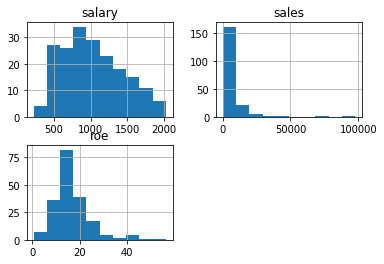

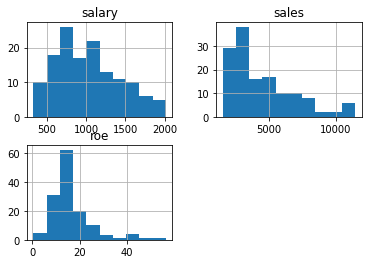

In [38]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

data = pd.read_csv('./data2/Ex_CEOSalary.csv', encoding='utf-8')

data['industry'] = data['industry'].replace(
    [1, 2, 3, 4], ['Service', 'IT', 'Finance', 'Others'])

Q1_salary = data['salary'].quantile(q=0.25)
Q3_salary = data['salary'].quantile(q=0.75)
IQR_salary = Q3_salary - Q1_salary
IQR_salary

data_IQR = data[(data['salary'] < Q3_salary + IQR_salary) &
                (data['salary'] > Q1_salary - IQR_salary)]
data_IQR.hist()

Q3_sales = data['sales'].quantile(q=0.75)
Q1_sales = data['sales'].quantile(q=0.25)
IQR_sales = Q3_sales - Q1_sales

data_IQR = data[(data['sales'] < Q3_sales + IQR_sales) &
                (data['sales'] > Q1_sales - IQR_salary) & (data['salary'] < Q3_salary + IQR_salary) &
                (data['salary'] > Q1_salary - IQR_salary)]

data_IQR.hist()